In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.callbacks import EarlyStopping
import math
import numpy as np
from matplotlib import pyplot as plt



In [2]:
(X_train,Y_train) , (X_test,Y_test) = datasets.cifar10.load_data()
X_test.shape

(10000, 32, 32, 3)

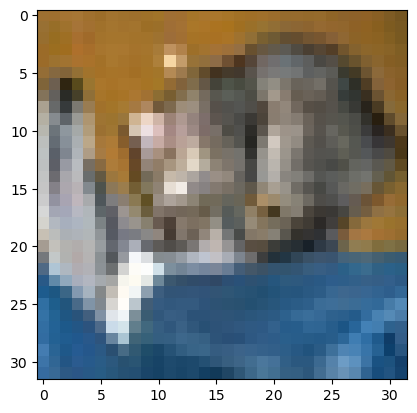

In [3]:
plt.imshow(X_test[0])

In [5]:
Y_train=Y_train.reshape(-1,)
Y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ["airplane" , "automobile" , "bird" , "car" , "deer" , "dog" ,"frog" ,"horse" ,"ship" , "truck"]

In [11]:
def plot_sample(X,y, index):
    plt.figure(figsize= (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

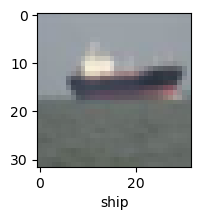

In [13]:
plot_sample(X_train,Y_train,69)

In [15]:
X_train = X_train/255
X_test = X_test/225

# implementing ANN aproch (normal neural network)

In [44]:

from tensorflow.keras.utils import to_categorical

# Convert Y_train to one-hot encoding
#Y_train_categorical = to_categorical(Y_train, num_classes=10)  # Adjust num_classes as needed

# Define the model
ANN = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(3000, activation='relu'),
    keras.layers.Dense(1000, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')    
])

# Compile the model
ANN.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

# Train the model
ANN.fit(X_train, Y_train, epochs=1)


2024-09-04 15:06:13.735850: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 95s 61ms/step - accuracy: 0.3063 - loss: 1.9373


In [21]:
ANN.evaluate(X_test,Y_test)

  1/313 ━━━━━━━━━━━━━━━━━━━━ 52s 169ms/step - accuracy: 0.5625 - loss: 1.1779

2024-09-04 12:33:35.572228: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.5171 - loss: 1.3637


[1.3714840412139893, 0.5131000280380249]

In [27]:
y_pred=ANN.predict(X_test)
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:8]

  9/313 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step

2024-09-04 12:35:16.282730: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 122880000 exceeds 10% of free system memory.


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


[3, 8, 8, 8, 4, 6, 3, 6]

In [31]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
#y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.52      0.62      0.57      1000
           1       0.53      0.76      0.63      1000
           2       0.43      0.35      0.39      1000
           3       0.32      0.51      0.40      1000
           4       0.50      0.40      0.44      1000
           5       0.53      0.26      0.35      1000
           6       0.56      0.59      0.57      1000
           7       0.66      0.50      0.57      1000
           8       0.58      0.69      0.63      1000
           9       0.63      0.45      0.53      1000

    accuracy                           0.51     10000
   macro avg       0.53      0.51      0.51     10000
weighted avg       0.53      0.51      0.51     10000



# implimenting the CNN aproach 

In [19]:


cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])




In [21]:


cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define the EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='accuracy',
    patience=15,
    mode='max',
    restore_best_weights=True
)


In [23]:
history = cnn.fit(
    X_train, Y_train,
    epochs=20,
    callbacks=[early_stopping],
    validation_data=(X_test, Y_test)
)


Epoch 1/20


2024-09-04 14:37:06.682466: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 28s 17ms/step - accuracy: 0.3823 - loss: 1.6861 - val_accuracy: 0.5660 - val_loss: 1.2390
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.5954 - loss: 1.1448 - val_accuracy: 0.6282 - val_loss: 1.0699
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6525 - loss: 0.9921 - val_accuracy: 0.6517 - val_loss: 0.9923
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.6891 - loss: 0.8956 - val_accuracy: 0.6633 - val_loss: 0.9964
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7096 - loss: 0.8414 - val_accuracy: 0.6832 - val_loss: 0.9190
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7336 - loss: 0.7714 - val_accuracy: 0.6673 - val_loss: 0.9910
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 16ms/step - accuracy: 0.7454 - loss: 0.7234 - val_accuracy: 0.6678 - val_loss: 1.0002
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 26s 17ms/step - accuracy: 0.7679 - loss: 0.66

In [25]:
cnn.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6748 - loss: 1.3849


[1.3946216106414795, 0.6751000285148621]

In [27]:
y_predicted=cnn.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [29]:
y_predicted[:6]

array([[1.4293742e-06, 1.5246599e-07, 3.9272927e-06, 9.9934697e-01,
        1.5614640e-05, 3.5818378e-04, 1.4768854e-04, 6.9322284e-11,
        1.2039661e-04, 5.5462615e-06],
       [1.2151554e-11, 8.7340128e-11, 2.1458020e-19, 1.4854100e-15,
        2.1668399e-22, 3.0381676e-17, 1.9711539e-23, 1.5512221e-26,
        9.9999994e-01, 1.7439262e-11],
       [2.4687557e-01, 4.1082880e-01, 1.2677034e-02, 5.6245793e-03,
        2.4376225e-02, 1.0071432e-03, 2.3477399e-07, 1.3163152e-01,
        8.9468472e-03, 1.5803196e-01],
       [9.9974346e-01, 2.9437058e-05, 1.4357982e-04, 8.8432444e-08,
        4.8759089e-06, 1.3268383e-09, 3.6777536e-08, 3.5855180e-06,
        7.4877746e-05, 2.1633596e-08],
       [5.0150506e-09, 5.7853492e-07, 3.3891801e-02, 3.7038054e-02,
        1.9964229e-01, 3.6677990e-05, 7.2939074e-01, 6.7155515e-13,
        1.1910921e-10, 2.5920533e-11],
       [3.9489594e-05, 1.7045680e-07, 5.9617785e-05, 3.3569388e-04,
        8.5025450e-04, 3.6877322e-05, 9.9866724e-01, 2.37

In [31]:
y_classes=[np.argmax(element) for element in y_predicted]
y_classes[:8]

[3, 8, 1, 0, 6, 6, 1, 6]

In [36]:
from tensorflow.keras.callbacks import EarlyStopping
# Get the best accuracy from the history
best_accuracy = max(history.history['accuracy'])  # or 'val_accuracy' for validation accuracy
best_val_accuracy = max(history.history['val_accuracy'])

print(f"Best Training Accuracy: {best_accuracy:.4f}")
print(f"Best Training val_Accuracy: {best_val_accuracy:.4f}")

Best Training Accuracy: 0.8777
Best Training val_Accuracy: 0.6923


In [33]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
#y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_predicted]

print("Classification Report: \n", classification_report(Y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.62      0.78      0.69      1000
           1       0.81      0.78      0.80      1000
           2       0.60      0.52      0.56      1000
           3       0.49      0.48      0.48      1000
           4       0.67      0.58      0.62      1000
           5       0.58      0.59      0.59      1000
           6       0.72      0.76      0.74      1000
           7       0.74      0.67      0.71      1000
           8       0.79      0.80      0.79      1000
           9       0.73      0.79      0.76      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.67     10000
weighted avg       0.68      0.68      0.67     10000



313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


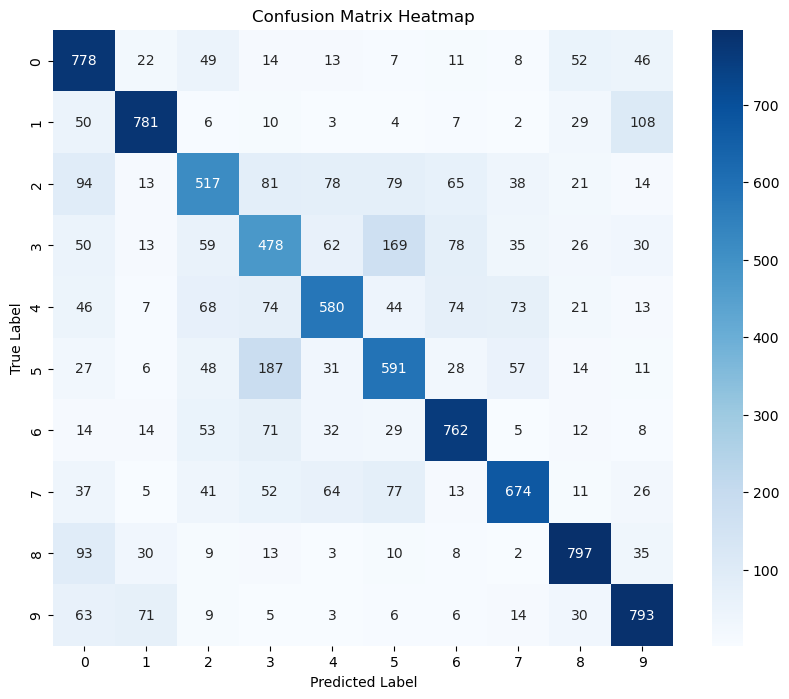

In [41]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical

# Generate predictions
y_pred = cnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get the class with highest probability
y_true = Y_test  # True labels

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()
